In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 

In [16]:
FREQ = 100

# load data
time = []
data = []
f = open('data.txt', 'rt')
count =0
for line in f:
    time.append(float(count)/FREQ)
    data.append(float(line))
    count += 1

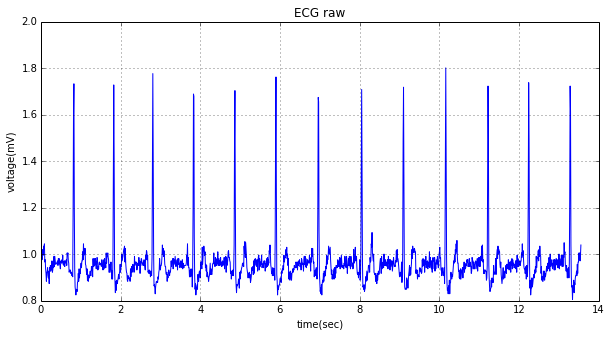

In [31]:
# Part 1. Plot ECG data
plt.plot(time, data)
plt.xlabel('time(sec)')
plt.ylabel('voltage(mV)')
plt.title('ECG raw')
plt.grid(True)
plt.show()

In [6]:
# Part 2. Identify R peaks
# - find a threshold which R peak should surpass and would filter out other peaks (use the fact that the values of 
#   datapoints around R peak are significantly larger than other points) 

threshold = np.percentile(data, 97.5)
print threshold

1.24328613288


In [18]:
# - find local maxima of the windows that have values larger than the threshold. Those maxima should be the R peaks. 
r_ind = []
r_val = []
op = False
lmax = 0
for ind, val in enumerate(data):
    if (op and val>threshold):
        lmax = max(lmax, val)
    elif (op and val<=threshold):
        r_ind.append(ind)
        r_val.append(lmax)
        op = False
    elif (op is False and val>threshold):
        op = True
        lmax= val    

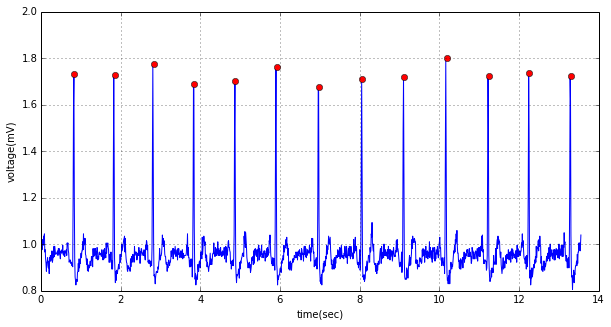

In [32]:
#  - plot R peaks
r_tp = [time[i] for i in r_ind]
fig, ax = plt.subplots()
ax.plot(time, data)
ax.plot(r_tp, r_val, 'ro')
plt.xlabel('time(sec)')
plt.ylabel('voltage(mV)')
plt.grid(True)
plt.show()

In [20]:
# Part 3. Calculate R-R peak intervals and heart rates
intervals = []
for ind, tp in enumerate(r_tp):
    if ind > 0:
        intervals.append(tp - r_tp[ind-1])

In [21]:
hrs = [60/t for t in intervals]

print "Mean heart rate:", np.mean(hrs)
print "Standard deviation:", np.std(hrs)

Mean heart rate: 57.8262151033
Standard deviation: 1.55271193992


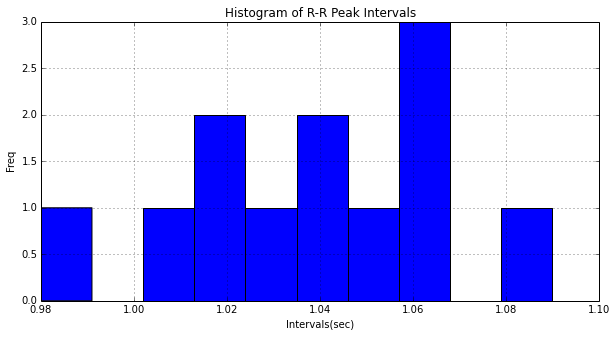

In [33]:
# Part 4. Histogram of R-R peak intervals
plt.hist(intervals)
plt.xlabel('Intervals(sec)')
plt.ylabel('Freq')
plt.title('Histogram of R-R Peak Intervals')
plt.grid(True)
plt.show()